<a href="https://colab.research.google.com/github/student-pornima26/CNN-Based-Plant-Disease-Prediction-for-Sustainable-Agriculture/blob/main/Tree_plant_disease_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN-Based-Plant-Disease-Prediction-for-Sustainable-Agriculture

## Importing Dataset
### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/new-plant-diseases-dataset


## Importing libraries

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing


### Training Image Preprocessing

In [14]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [15]:
import tensorflow as tf
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [16]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [17]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break


tf.Tensor(
[[[[158.   138.   137.  ]
   [161.75 141.75 140.75]
   [161.75 141.75 140.75]
   ...
   [199.5  181.5  181.5 ]
   [195.75 177.75 177.75]
   [182.25 164.25 164.25]]

  [[166.5  146.5  145.5 ]
   [149.   129.   128.  ]
   [154.75 134.75 133.75]
   ...
   [179.75 161.75 161.75]
   [177.25 159.25 159.25]
   [192.5  174.5  174.5 ]]

  [[155.75 135.75 134.75]
   [153.75 133.75 132.75]
   [161.75 141.75 140.75]
   ...
   [181.25 163.25 163.25]
   [192.75 174.75 174.75]
   [187.75 169.75 169.75]]

  ...

  [[106.5   92.5   81.5 ]
   [100.5   86.5   75.5 ]
   [101.    87.    76.  ]
   ...
   [124.   116.75  91.75]
   [126.75 109.5   96.25]
   [131.25 106.75  99.25]]

  [[102.75  90.75  78.75]
   [ 96.5   84.5   72.5 ]
   [ 98.75  86.75  74.75]
   ...
   [ 87.    85.    57.  ]
   [110.25  98.5   83.5 ]
   [150.25 132.25 122.5 ]]

  [[101.75  89.75  77.75]
   [ 91.75  79.75  67.75]
   [ 95.    83.    71.  ]
   ...
   [ 75.5   78.    49.5 ]
   [ 28.5   21.5    7.75]
   [ 46.75  34.25  2

## Building Model

In [18]:
import tensorflow as tf
cnn = tf.keras.models.Sequential()

## Building Convolutional Layer

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [25]:
cnn.add(tf.keras.layers.Flatten())

In [26]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [27]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [28]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [29]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling and Training Phase

In [30]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 160s 73ms/step - accuracy: 0.8354 - loss: 0.5233 - val_accuracy: 0.9192 - val_loss: 0.2549
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9037 - loss: 0.2960 - val_accuracy: 0.9242 - val_loss: 0.2390
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 62ms/step - accuracy: 0.9351 - loss: 0.2040 - val_accuracy: 0.9393 - val_loss: 0.1919
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9535 - loss: 0.1424 - val_accuracy: 0.9454 - val_loss: 0.1734
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 65ms/step - accuracy: 0.9639 - loss: 0.1130 - val_accuracy: 0.9460 - val_loss: 0.1697
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9724 - loss: 0.0857 - val_accuracy: 0.9639 - val_loss: 0.1143
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 0.9738 - loss: 0.0778 - val_accuracy: 0.9656 - val_loss: 0.1202
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 

## Evaluating Model

In [34]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.9922 - loss: 0.0249
Training accuracy: 0.9928586483001709


In [35]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9697 - loss: 0.1021
Validation accuracy: 0.9685863852500916


## Saving Model

In [36]:
cnn.save('trained_plant_disease_model.keras')

In [37]:
training_history.history #Return Dictionary of history

{'accuracy': [0.8601180911064148,
  0.9128814339637756,
  0.9390710592269897,
  0.9558290243148804,
  0.9655736684799194,
  0.9719467759132385,
  0.9756170511245728,
  0.9795433282852173,
  0.9817910194396973,
  0.9833985567092896],
 'loss': [0.4436066448688507,
  0.26779112219810486,
  0.18830756843090057,
  0.13592973351478577,
  0.10657186806201935,
  0.08734483271837234,
  0.07427041232585907,
  0.06152797490358353,
  0.05764833465218544,
  0.05105394497513771],
 'val_accuracy': [0.9191896319389343,
  0.9241976141929626,
  0.9392784237861633,
  0.9454245567321777,
  0.9459936022758484,
  0.963862955570221,
  0.9655702114105225,
  0.9679604172706604,
  0.9622695446014404,
  0.9685863852500916],
 'val_loss': [0.2548949718475342,
  0.23898015916347504,
  0.19186241924762726,
  0.17336180806159973,
  0.16974137723445892,
  0.11434701085090637,
  0.12019529938697815,
  0.10578744113445282,
  0.12390080094337463,
  0.10241371393203735]}

In [38]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [39]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Validation

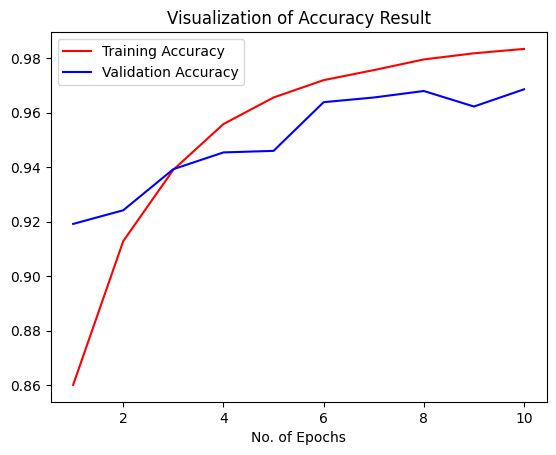

In [40]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [44]:
class_name = validation_set.class_names

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 33 files belonging to 1 classes.


In [46]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [47]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [48]:
Y_true

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [49]:
predicted_categories

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([ 2,  2,  2,  2,  0,  0,  0,  8,  8,  8, 20, 20,  0, 20, 20, 22, 22,
       29, 30, 29, 29, 29, 29, 37, 37, 37, 37, 35, 35, 35, 35, 35, 35])>

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [52]:
import numpy as np
from sklearn.metrics import classification_report

# Identify unique labels present in Y_true and predicted_categories
unique_labels = np.unique(np.concatenate((Y_true.numpy(), predicted_categories.numpy())))

# Filter class_name to match these unique labels
filtered_target_names = [class_name[i] for i in unique_labels]

# Precision Recall Fscore
print(classification_report(Y_true, predicted_categories, labels=unique_labels, target_names=filtered_target_names))

                                        precision    recall  f1-score   support

                    Apple___Apple_scab       1.00      0.12      0.22        33
              Apple___Cedar_apple_rust       0.00      0.00      0.00         0
           Corn_(maize)___Common_rust_       0.00      0.00      0.00         0
                 Potato___Early_blight       0.00      0.00      0.00         0
                      Potato___healthy       0.00      0.00      0.00         0
                 Tomato___Early_blight       0.00      0.00      0.00         0
                  Tomato___Late_blight       0.00      0.00      0.00         0
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.00      0.00      0.00         0
                      Tomato___healthy       0.00      0.00      0.00         0

                              accuracy                           0.12        33
                             macro avg       0.11      0.01      0.02        33
                          weighted avg

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix Visualization

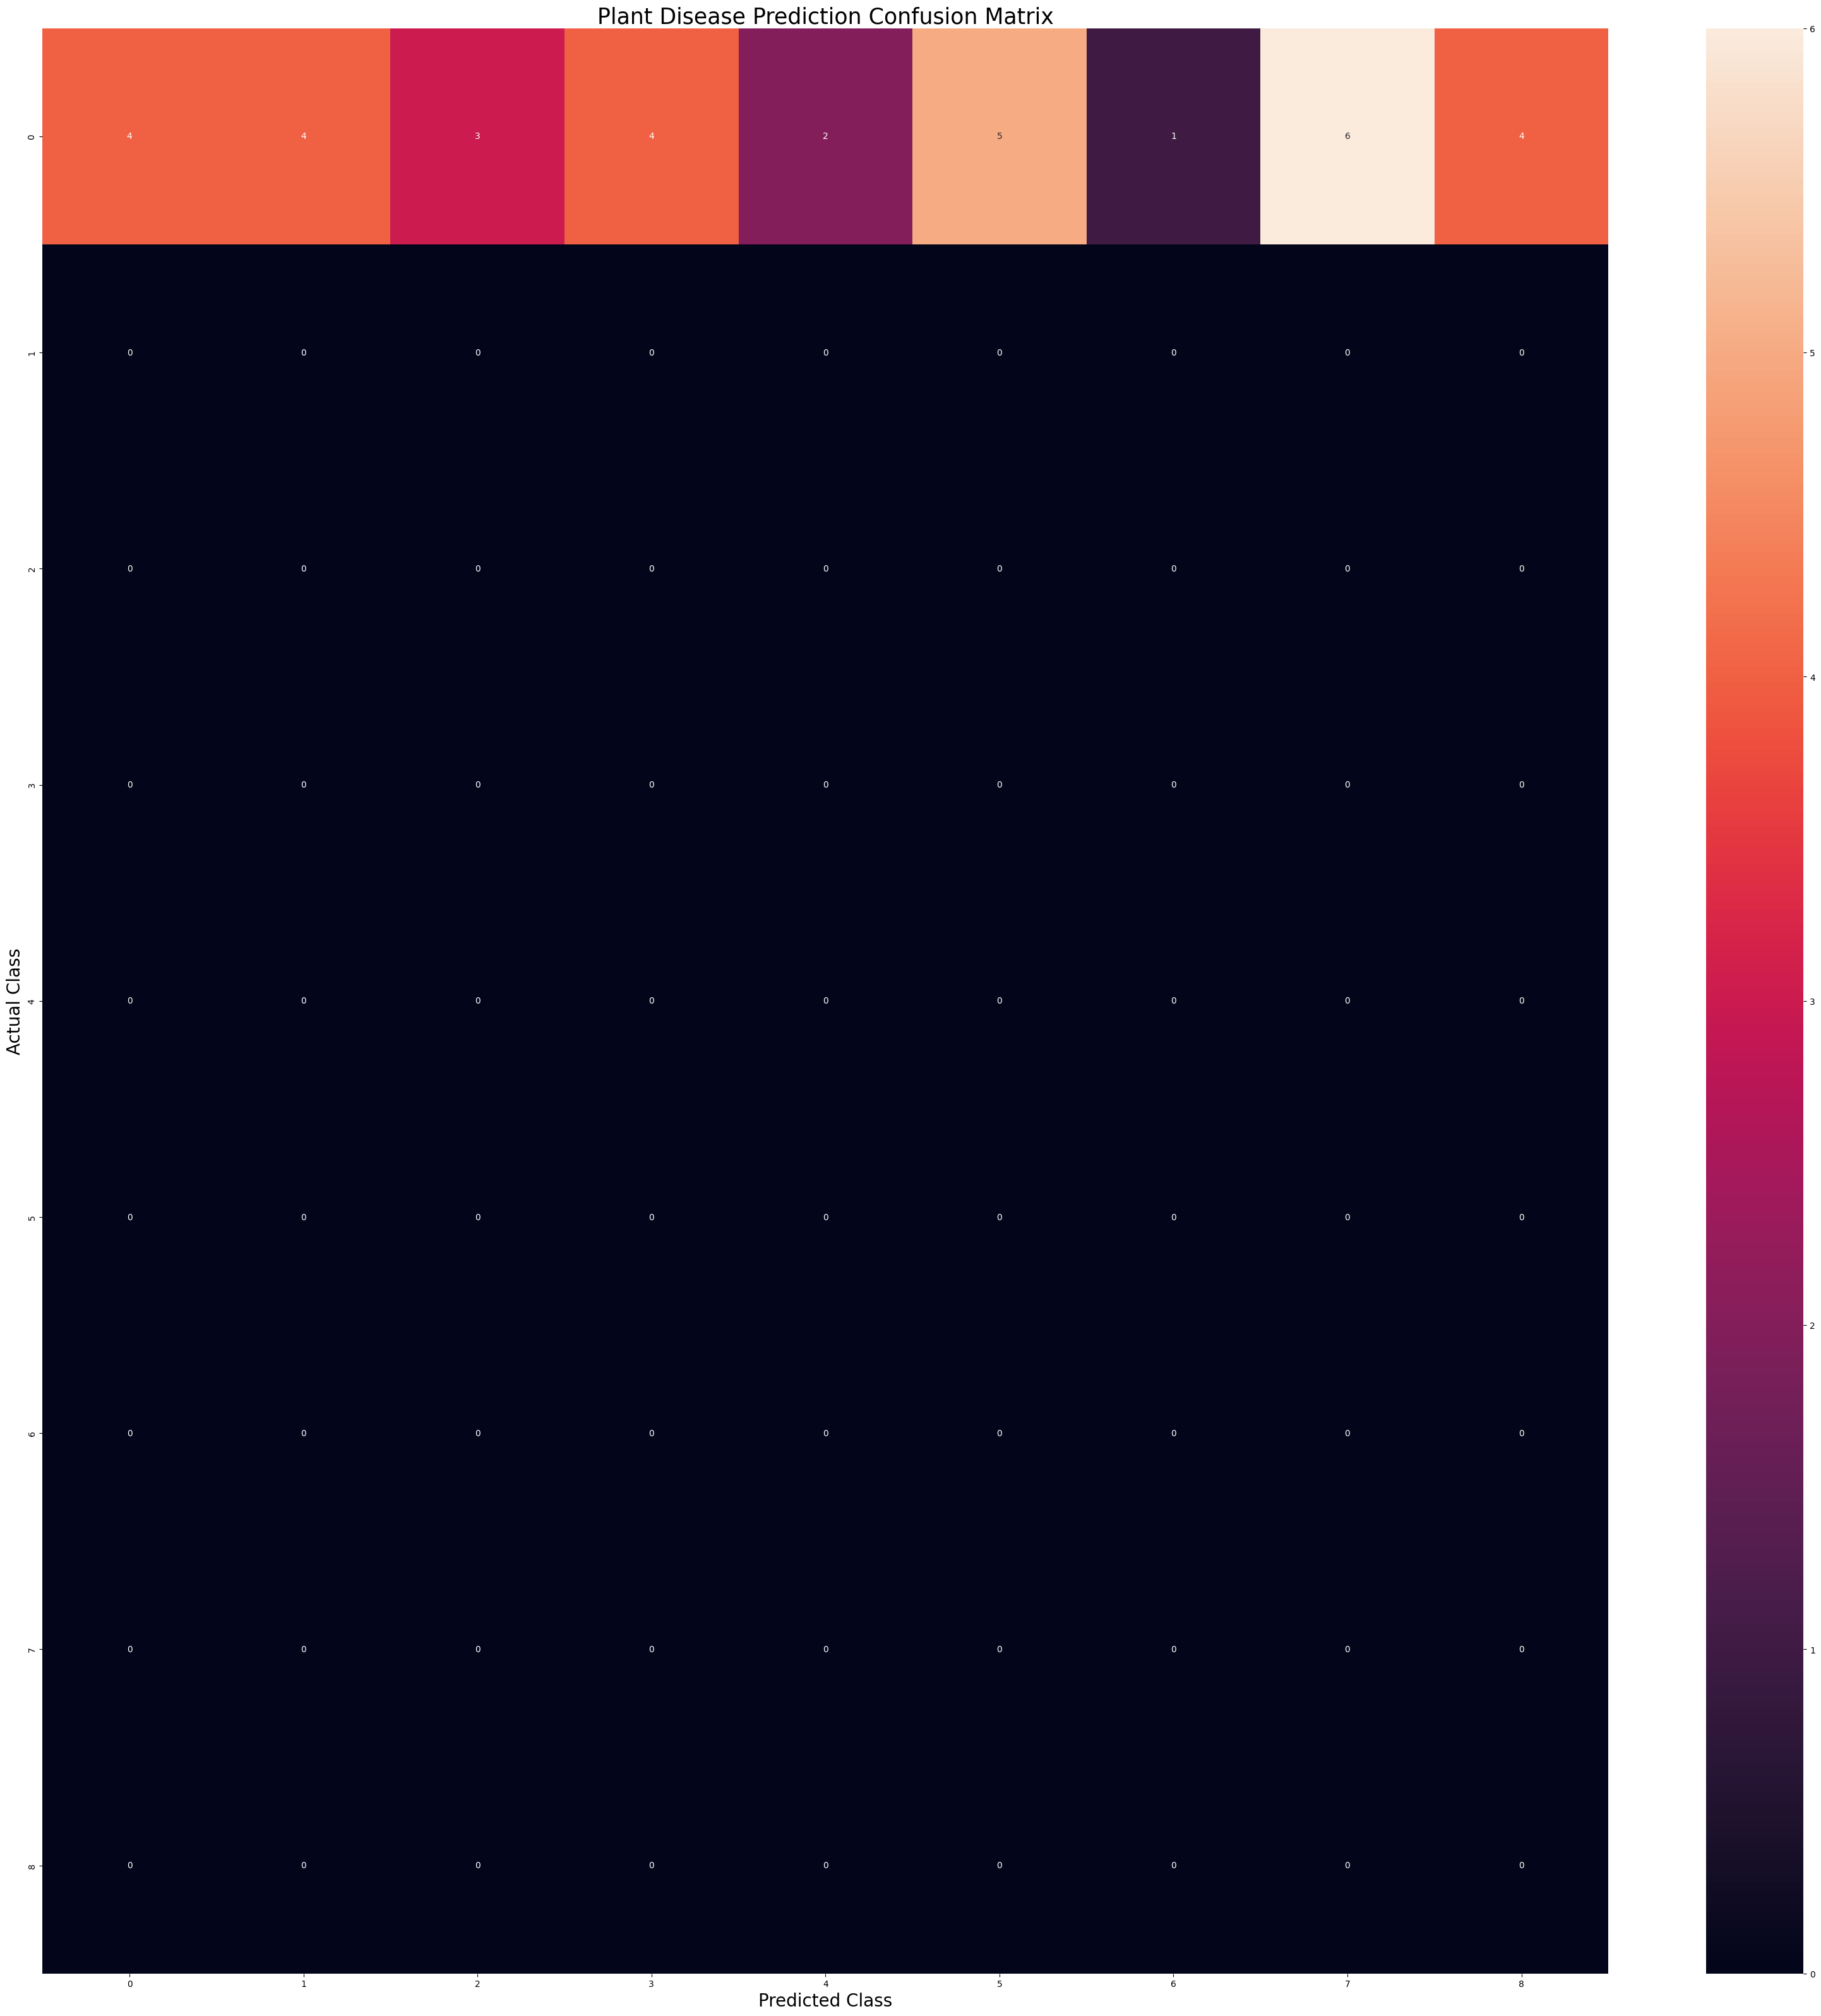

In [54]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()